# Required Libraries

In [188]:
import requests, io 
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Data Collection

## Loading Steps

1.   Data is retrieved from "UC Irvine Machine Learning Repository" via request.
2.   The source file is in a compressed zip format therefore it is requred to unzip the file, for this step I used zipfile library.
3. The unzipped file contains data.csv file where elements are delimited by ";".

## Loading Code

In [189]:
URL = 'https://archive-beta.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip'

req = requests.get(URL)

zipped = ZipFile(io.BytesIO(req.content))

In [190]:
dataset = pd.read_csv(zipped.open('data.csv'), delimiter=';')

In [191]:
dataset.head().transpose()

,0,1,2,3,4
Marital status,1,1,1,1,2
Application mode,17,15,1,17,39
Application order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime/evening attendance\t,1,1,1,1,0
Previous qualification,1,1,1,1,1
Previous qualification (grade),122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mother's qualification,19,1,37,38,37
Father's qualification,12,3,37,37,38


# Data Cleaning and Preprocessing

## Data Overview

### Code

In [192]:
dataset.shape

(4424, 37)

In [193]:
dataset.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [194]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Comment

---
The dataset contains 37 attributes (one of which is the target). Moreover, Most of the attributes are categorical however are represented as numeric (discrete or binary). 

The following attributes need to be converted to categorical:
  
  - 'Marital status', 
  - 'Application mode', 
  - 'Application order', 
  - 'Course', 
  - 'Daytime/evening attendance\t', 
  - 'Previous qualification', 
  - 'Nacionality', 
  - "Mother's qualification", 
  - "Father's qualification", 
  - "Mother's occupation", 
  - "Father's occupation", 
  - 'Displaced', 
  - 'Educational special needs', 
  - 'Debtor', 
  - 'Tuition fees up to date', 
  - 'Gender', 
  - 'Scholarship holder', 
  - 'International'

---

### Code Continued

In [195]:
categorical_attributes = [
    'Marital status', 
    'Application mode', 
    'Application order', 
    'Course', 
    'Daytime/evening attendance\t', 
    'Previous qualification', 
    'Nacionality', 
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation", 
    'Displaced', 
    'Educational special needs', 
    'Debtor', 
    'Tuition fees up to date', 
    'Gender', 
    'Scholarship holder', 
    'International'
]

In [196]:
df = dataset.iloc[:,].copy()
for column in categorical_attributes:
  df[column] = df[column].astype('category')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

In [198]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age at enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Curricular units 1st sem (credited),4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
Curricular units 1st sem (enrolled),4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
Curricular units 1st sem (evaluations),4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
Curricular units 1st sem (approved),4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
Curricular units 1st sem (without evaluations),4424.0,0.137658,0.690880,0.00,0.00,0.000000,0.000000,12.000000
Curricular units 2nd sem (credited),4424.0,0.541817,1.918546,0.00,0.00,0.000000,0.000000,19.000000


## Incomplete Data

### Code

In [199]:
df.isnull().sum().sum()

0

### Comment

---

**Dataset does not contain missing values.**

---

## Incorrect Data

### Code

In [200]:
for column in df.columns:
  print(df[column].value_counts(),"\n")

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64 

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
27       1
57       1
Name: Application mode, dtype: int64 

1    3026
2     547
3     309
4     249
5     154
6     137
0       1
9       1
Name: Application order, dtype: int64 

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64 

1    3941
0     483
Name: Daytime/evening attendance\t, dtype: int64 

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
14       1
5        1
Name: Previous qualification, dtype: int64 

133.1    4

### Comment

---

**Values contained in each feature are consistent with feature description.**

**Dataset does not contain incorrect data.**

---

## Data Imbalance

### Code

In [201]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

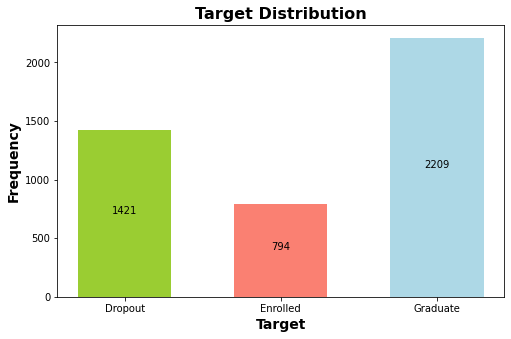

In [202]:
fig = plt.figure(figsize =(8, 5))
x = df.groupby(['Target']).size().index 
y = df.groupby(['Target']).size().values

plt.bar(x, y, width = 0.6, color=['yellowgreen','salmon','lightblue'])
plt.title('Target Distribution', fontsize=16, fontweight='bold') 
plt.xlabel('Target', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

addlabels(x, y)

plt.show()

### Comment

---
**The Target variable is heavily skewed towards "Graduate" class.**

**Data imbalance is present in the dataset**

---

## Irrelevant Data

### Code

In [203]:
df = df[(df['Target'] != 'Enrolled')]

In [204]:
df['Target'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})

<ipython-input-204-ad44345b3149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})


### Comment

---

**Target variable contains values for students who have "Enrolled", which is not inline with the goal of this project and its research questions. 
Therefore, each row with value "Enrolled" will be dropped and each row with value "Dropout" and "Graduate" will be replaced with 0 and 1 respectively.**

---

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  3630 non-null   category
 1   Application mode                                3630 non-null   category
 2   Application order                               3630 non-null   category
 3   Course                                          3630 non-null   category
 4   Daytime/evening attendance	                     3630 non-null   category
 5   Previous qualification                          3630 non-null   category
 6   Previous qualification (grade)                  3630 non-null   float64 
 7   Nacionality                                     3630 non-null   category
 8   Mother's qualification                          3630 non-null   category
 9   Father's qualification        

## Duplicated Data

### Code

In [206]:
df.duplicated().sum()

0

### Comment

---

**The dataset does not contain duplicated values.**

---

## Data Normalization

### Preliminary analysis - Code

In [207]:
non_categorical_attributes = [column for column in df.columns if df[column].name not in categorical_attributes and df[column].name != 'Target']

In [208]:
def simple_stats(df,col_names):
  name = []
  mean = []
  min = []
  max = []

  for i in col_names:
    name.append(i)
    mean.append(df[i].mean())
    min.append(df[i].min())
    max.append(df[i].max())

  dict = {
      'Feature': name,
      'Mean': mean,
      'Min': min,
      'Max': max,
  }

  dff = pd.DataFrame(dict)

  return dff.sort_values(by=['Mean'], ascending=False)

In [209]:
simple_stats(df,non_categorical_attributes)

,Feature,Mean,Min,Max
0,Previous qualification (grade),132.920606,95.00,190.000000
1,Admission grade,127.293939,95.00,190.000000
2,Age at enrollment,23.461157,17.00,70.000000
15,Unemployment rate,11.630358,7.60,16.200000
7,Curricular units 1st sem (grade),10.534860,0.00,18.875000
13,Curricular units 2nd sem (grade),10.036155,0.00,18.571429
5,Curricular units 1st sem (evaluations),8.071074,0.00,45.000000
11,Curricular units 2nd sem (evaluations),7.763085,0.00,33.000000
4,Curricular units 1st sem (enrolled),6.337466,0.00,26.000000
10,Curricular units 2nd sem (enrolled),6.296419,0.00,23.000000


In [210]:
df.corr()['Target'].sort_values()

Age at enrollment                                -0.267229
Curricular units 2nd sem (without evaluations)   -0.102687
Curricular units 1st sem (without evaluations)   -0.074642
Inflation rate                                   -0.030326
Unemployment rate                                 0.004198
Curricular units 1st sem (credited)               0.046900
GDP                                               0.050260
Curricular units 2nd sem (credited)               0.052402
Curricular units 1st sem (evaluations)            0.059786
Previous qualification (grade)                    0.109464
Curricular units 2nd sem (evaluations)            0.119239
Admission grade                                   0.128058
Curricular units 1st sem (enrolled)               0.161074
Curricular units 2nd sem (enrolled)               0.182897
Curricular units 1st sem (grade)                  0.519927
Curricular units 1st sem (approved)               0.554881
Curricular units 2nd sem (grade)                  0.6053

### Comment

---

After execution the code below and observing statistics of numeric values. 
```
simple_stats(df,non_categorical_attributes)
```
It is evident that the numeric values require scaling.

---

After executing the code below and observing the correlations.
```
df.corr()['Target'].sort_values()
```
Most of the values for Pearson correlation are positive however, only few posses some liniear relationship.

Therefore, the technique for data normalization must work well with variables that have a non-linear relationship with the target variable. 

---
"Box-Cox" technique is a good candidate for feature scaling of numeric data in this dataset. 

The reasoning behind "Box-Cox Transformation" technique is that it reduces skewness, improves model performance, can make the data more normally distributed, and what is important, it works well with variables that have a non-linear relationship with the target variable.

---

### Box-Cox transformation - Code

In [211]:
df_box_cox = df.iloc[:,].copy()

In [212]:
def box_cox_transformation(x):
  x = x + abs(x.min()) + 1
  lambda_param = stats.boxcox_normmax(x)
  data_boxcox = stats.boxcox(x, lmbda=lambda_param)

  return data_boxcox


In [213]:
df_box_cox.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Previous qualification (grade),3630.0,132.920606,13.238373,95.00,125.000000,133.100000,140.00,190.000000
Admission grade,3630.0,127.293939,14.611295,95.00,118.000000,126.500000,135.10,190.000000
Age at enrollment,3630.0,23.461157,7.827994,17.00,19.000000,20.000000,25.00,70.000000
Curricular units 1st sem (credited),3630.0,0.754270,2.477277,0.00,0.000000,0.000000,0.00,20.000000
Curricular units 1st sem (enrolled),3630.0,6.337466,2.570773,0.00,5.000000,6.000000,7.00,26.000000
Curricular units 1st sem (evaluations),3630.0,8.071074,4.286632,0.00,6.000000,8.000000,10.00,45.000000
Curricular units 1st sem (approved),3630.0,4.791460,3.237845,0.00,3.000000,5.000000,6.00,26.000000
Curricular units 1st sem (grade),3630.0,10.534860,5.057694,0.00,11.000000,12.341429,13.50,18.875000
Curricular units 1st sem (without evaluations),3630.0,0.128926,0.679111,0.00,0.000000,0.000000,0.00,12.000000
Curricular units 2nd sem (credited),3630.0,0.581818,2.022688,0.00,0.000000,0.000000,0.00,19.000000


In [214]:
df_box_cox[non_categorical_attributes] = df_box_cox[non_categorical_attributes].apply(box_cox_transformation)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [215]:
df_box_cox.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Previous qualification (grade),3630.0,3.527568,2.261759e-02,3.456182,3.514480,3.528640,3.540247,3.613993
Admission grade,3630.0,0.745630,4.587651e-05,0.745510,0.745602,0.745631,0.745657,0.745783
Age at enrollment,3630.0,0.052786,6.939850e-18,0.052786,0.052786,0.052786,0.052786,0.052786
Curricular units 1st sem (credited),3630.0,0.133987,3.545596e-01,0.000000,0.000000,0.000000,0.000000,1.384014
Curricular units 1st sem (enrolled),3630.0,4.413167,1.487907e+00,0.000000,3.688126,4.289148,4.867161,13.752980
Curricular units 1st sem (evaluations),3630.0,5.743552,2.678112e+00,0.000000,4.578287,5.850329,7.061682,24.255546
Curricular units 1st sem (approved),3630.0,3.634509,2.262557e+00,0.000000,2.509428,3.928117,4.597643,15.678837
Curricular units 1st sem (grade),3630.0,7417.332206,4.773834e+03,0.000000,4869.718790,7418.373672,10326.755325,36132.465766
Curricular units 1st sem (without evaluations),3630.0,0.034049,1.350471e-01,0.000000,0.000000,0.000000,0.000000,0.775188
Curricular units 2nd sem (credited),3630.0,0.110482,3.039932e-01,0.000000,0.000000,0.000000,0.000000,1.239678
